 # Import libraries 

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge  # Changed from LinearRegression to Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Data = pd.read_csv("/kaggle/input/housing-price-prediction-data/housing_price_dataset.csv")
Data

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065
...,...,...,...,...,...,...
49995,1282,5,3,Rural,1975,100080.865895
49996,2854,2,2,Suburb,1988,374507.656727
49997,2979,5,3,Suburb,1962,384110.555590
49998,2596,5,2,Rural,1984,380512.685957


In [3]:
X = Data.drop(['Neighborhood', 'YearBuilt'], axis=1)
y = Data['Price']

In [4]:
X

,SquareFeet,Bedrooms,Bathrooms,Price
0,2126,4,1,215355.283618
1,2459,3,2,195014.221626
2,1860,2,1,306891.012076
3,2294,2,1,206786.787153
4,2130,5,2,272436.239065
...,...,...,...,...
49995,1282,5,3,100080.865895
49996,2854,2,2,374507.656727
49997,2979,5,3,384110.555590
49998,2596,5,2,380512.685957


In [5]:
Data.isna().sum() #Missing values

SquareFeet      0
Bedrooms        0
Bathrooms       0
Neighborhood    0
YearBuilt       0
Price           0
dtype: int64

# splitting data

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scaling data

In [7]:
scaler = StandardScaler()  
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# model

In [8]:
model = Ridge(alpha=1.0)  # I used Ridge (type of linear regression) cuz it raised the model performance  
model.fit(X_train_scaled, y_train)

Ridge()

# prediction

In [9]:
y_pred = model.predict(X_test_scaled)
y_pred

array([170837.80133533, 126913.98193699, 246612.42749093, ...,
       352181.65034152, 244828.18613252, 246512.15831529])

# model evaluation 

In [10]:
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Absolute Percentage Error:", mean_absolute_percentage_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

Mean Absolute Error: 2.286131788118796
Mean Absolute Percentage Error: 1.5024791980030484e-05
Mean Squared Error: 8.191860586635494


# model visualization 

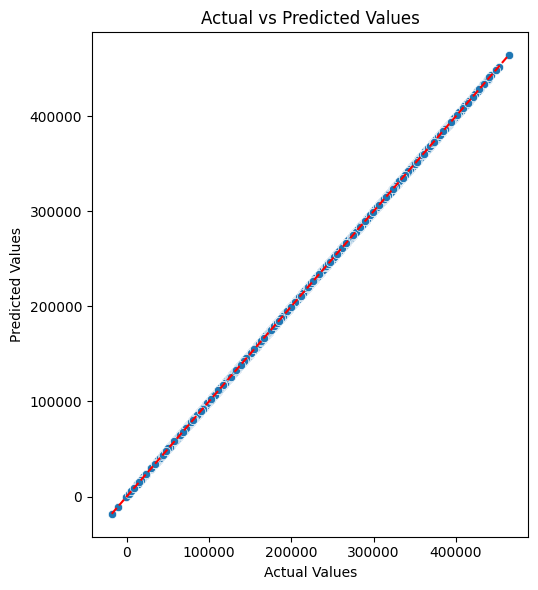

In [14]:
# Visualize the model
plt.figure(figsize=(10, 6))

# Scatter plot of actual vs predicted values
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')

plt.tight_layout()
plt.show()